# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18524806,
            "total_supply": 18524806,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 12933.25,
                    "volume_24h": 23933267716,
                    "market_cap": 239027997092,
                    "percentage_change_1h": -0.135990847567116,
                    "percentage_change_24h": -0.120030125105456,
                    "percentage_change_7d": 12.5062690286515,
                    "percent_change_1h": -0.135990847567116,
                    "percent_change_24h": -0.120030125105456,
                    "percent_change_7d": 12.5062690286515
                },
                "CAD": {
                    "price": 17003.343775,
                    "volume_24h": 31465067066.2252,
              

In [6]:
# Fetch current price
# Compute current value of my crpto
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15519.90
The current value of your 5.3 ETH is $2191.82


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df
# Drop the time component of the date
df_portfolio.index = df_portfolio.index.date
# Preview DataFrame
df_portfolio.head()

AGG                                        SPY                 \
              open      high     low   close   volume    open    high    low   
2020-10-16  117.99  118.0778  117.88  117.88  3589312  348.96  350.75  347.1   

                              
             close    volume  
2020-10-16  347.25  62467863

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [11]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
# Creates pandas DataFrame. 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 
# print the data 
df_savings 

,amount
crypto,17711.715
shares,40938.500


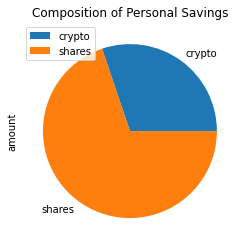

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = total_crypto + total_shares_value
# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")
              

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                       SPY          \
              open     high     low   close   volume    open    high   
2015-10-16  109.90  109.940  109.78  109.78  1497588  202.83  203.29   
2015-10-19  109.78  109.895  109.65  109.85  1289942  202.50  203.37   
2015-10-20  109.64  109.780  109.55  109.65  1672562  202.85  203.84   
2015-10-21  109.73  109.950  109.73  109.89  1119723  203.61  203.79   
2015-10-22  109.90  110.050  109.83  109.94  1817244  202.98  205.51   

                                         
                 low   close     volume  
2015-10-16  201.9200  203.14   79323870  
2015-10-19  202.1300  203.33   61255929  
2015-10-20  202.5471  203.07   60081395  
2015-10-21  201.6500  201.82   83704739  
2015-10-22  202.8100  205.22  121670959

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [18]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                    SPY  \
              open     high     low   close   volume daily_return    open   
2015-10-16  109.90  109.940  109.78  109.78  1497588          NaN  202.83   
2015-10-19  109.78  109.895  109.65  109.85  1289942     0.000638  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244     0.000455  202.98   

                                                              
              high       low   close     volume daily_return  
2015-10-16  203.29  201.9200  203.14   79323870          NaN  
2015-10-19  203.37  202.1300  203.33   61255929     0.000935  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005107,1.000309,1.002493,1.007545,1.004830,0.987543,1.009171,0.999268,0.998032,0.988037,...,0.992524,1.005799,1.004323,1.007374,1.005130,1.004904,1.002289,0.992051,0.984878,0.995307
2,1.003023,1.006102,1.013735,0.996004,1.008396,0.994334,1.005724,1.002579,0.994032,1.001065,...,0.990494,1.003566,1.000566,0.998407,1.006194,1.000432,0.998653,0.994088,0.982282,0.989240
3,1.010982,1.010772,1.005505,0.992251,1.018508,0.994103,1.007429,1.001767,0.992933,0.994006,...,0.985767,1.013013,0.993752,1.002091,0.996916,1.009132,1.002504,1.004302,0.978462,0.992025
4,1.020830,1.012475,1.000610,0.988565,1.018187,0.997527,0.999223,1.002137,0.987483,0.997037,...,0.983145,1.012652,0.991428,0.993478,1.004444,1.020523,0.997102,1.011669,0.977080,0.977067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.631656,15.432514,14.411120,11.348129,4.569131,16.943784,16.368428,8.156279,1.970467,21.484568,...,13.125870,15.589180,3.675227,1.300893,17.949508,10.796507,4.744138,5.003775,4.276123,7.777889
7557,3.687859,15.473538,14.391479,11.340133,4.591751,17.047806,16.462083,8.094034,1.977257,21.760416,...,13.175596,15.516544,3.668680,1.290501,17.856224,10.740935,4.739638,5.013834,4.373039,7.716372
7558,3.719202,15.465159,14.670486,11.369225,4.581251,17.113394,16.219174,8.058675,1.953117,21.723553,...,13.140604,15.778406,3.672565,1.290351,17.888663,10.653341,4.766043,5.018417,4.344886,7.657916
7559,3.733638,15.354410,14.572867,11.452647,4.607976,17.096608,16.523968,7.974774,1.967982,21.808210,...,13.077979,15.994031,3.717172,1.298651,17.968078,10.565459,4.751327,4.992472,4.391451,7.643109


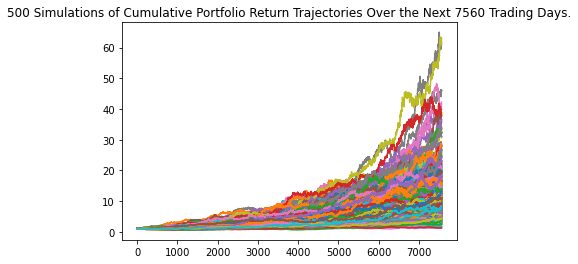

In [20]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

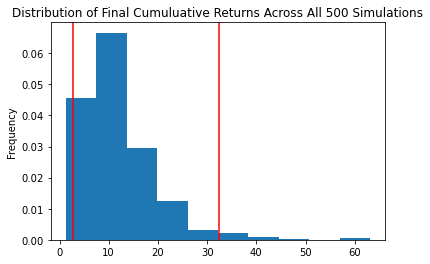

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
print(even_tbl)

count           500.000000
mean             11.985793
std               7.720138
min               1.275986
25%               6.921512
50%              10.039097
75%              15.247943
max              63.124559
95% CI Lower      2.804233
95% CI Upper     32.355725
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $56084.66 and $647114.5


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $84126.99 and $970671.75


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                    SPY  \
              open     high     low   close   volume daily_return    open   
2015-10-16  109.90  109.940  109.78  109.78  1497588          NaN  202.83   
2015-10-19  109.78  109.895  109.65  109.85  1289942     0.000638  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244     0.000455  202.98   

                                                              
              high       low   close     volume daily_return  
2015-10-16  203.29  201.9200  203.14   79323870          NaN  
2015-10-19  203.37  202.1300  203.33   61255929     0.000935  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997396,1.004546,1.010882,1.001754,0.996966,1.012349,1.002523,0.983566,0.990249,0.989293,...,0.995280,1.006566,1.007523,0.988499,1.014594,0.996447,1.000279,0.996192,1.004367,1.000089
2,0.993430,0.989783,1.008664,1.004731,0.985225,1.011484,0.989402,0.990194,1.001002,1.002764,...,1.001612,1.005115,0.990763,0.988182,1.005980,0.992691,1.004772,0.984030,0.999758,0.984552
3,0.991283,0.976656,1.001123,1.004576,0.996960,1.022041,0.992589,0.996973,1.004607,1.002085,...,1.005409,0.998226,0.986516,0.993394,1.017833,0.996290,1.015160,0.989059,0.995515,0.983313
4,0.996077,0.967820,0.992498,0.997377,0.985041,1.031547,1.000328,1.011902,1.003343,1.010030,...,1.015725,1.012593,0.984559,1.010429,1.024357,0.986361,1.007611,0.995650,0.998868,0.974074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.876102,1.498915,1.581043,2.011491,1.553471,1.823508,1.542547,1.508847,1.863601,1.570992,...,1.423435,1.388746,1.680167,2.675049,1.102106,1.571771,1.636649,0.849859,1.734009,2.089216
1257,1.875950,1.502969,1.578282,2.026997,1.556017,1.815653,1.540862,1.501510,1.850986,1.573723,...,1.424306,1.369669,1.674920,2.673413,1.103618,1.602285,1.603338,0.850430,1.734067,2.078023
1258,1.866464,1.510894,1.583567,2.032364,1.564564,1.841149,1.537702,1.490729,1.852066,1.569516,...,1.418574,1.379657,1.662756,2.637030,1.105749,1.609092,1.606486,0.852677,1.728675,2.088922
1259,1.861501,1.502305,1.576699,2.053687,1.561532,1.841602,1.530548,1.510253,1.896624,1.567007,...,1.424441,1.382726,1.663427,2.630303,1.101333,1.594758,1.607742,0.851351,1.735658,2.088521


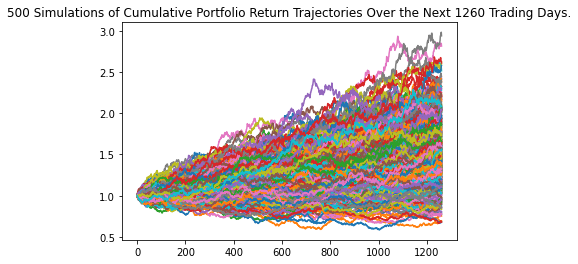

In [27]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

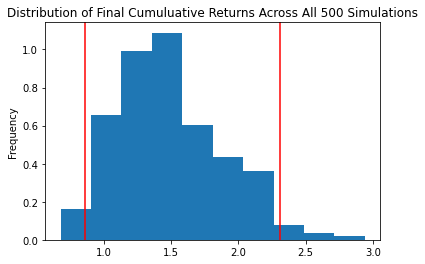

In [28]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.486514
std               0.387564
min               0.679219
25%               1.196548
50%               1.439301
75%               1.727285
max               2.940168
95% CI Lower      0.858396
95% CI Upper      2.311416
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment_five = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51503.74 and $138684.99


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                    SPY  \
              open     high     low   close   volume daily_return    open   
2015-10-16  109.90  109.940  109.78  109.78  1497588          NaN  202.83   
2015-10-19  109.78  109.895  109.65  109.85  1289942     0.000638  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244     0.000455  202.98   

                                                              
              high       low   close     volume daily_return  
2015-10-16  203.29  201.9200  203.14   79323870          NaN  
2015-10-19  203.37  202.1300  203.33   61255929     0.000935  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006593,0.998083,1.004694,1.004219,1.007037,0.992228,0.991363,1.009385,1.000642,0.996089,...,0.997047,0.999849,0.996051,1.007769,0.998189,1.006976,0.989409,1.002230,1.006345,1.008708
2,1.007032,0.995615,1.004888,0.997848,1.015800,0.980431,0.984182,1.004995,0.994899,1.002408,...,0.997918,0.990801,1.011223,0.998014,0.991565,1.012171,0.990565,1.021114,0.990718,1.005569
3,1.013500,1.008832,1.004113,0.987477,1.004247,0.978274,0.985068,0.998427,0.991253,1.008605,...,1.005817,0.986442,1.011641,1.000001,0.987074,1.011988,0.988455,1.020340,0.992321,1.003821
4,1.015980,1.010356,0.998792,0.985656,1.007962,0.964164,0.983434,1.009178,0.986879,1.013258,...,1.003233,0.989633,1.020112,1.012210,0.980547,1.012113,1.000204,1.021370,1.005751,1.002969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.406159,2.676671,1.803486,2.223874,3.013998,2.449104,4.732133,2.998075,3.446856,2.071441,...,2.724218,1.207843,2.976620,1.993246,3.285040,0.977760,1.266271,2.685288,2.027031,1.105045
2517,1.416298,2.671816,1.832844,2.216866,3.013798,2.449056,4.726586,2.974323,3.392652,2.094228,...,2.711935,1.220345,2.975376,2.012907,3.285117,0.965310,1.259385,2.683645,2.023835,1.100282
2518,1.401870,2.665460,1.847712,2.209022,3.005874,2.444104,4.695521,3.013365,3.430736,2.087387,...,2.668226,1.220535,3.017201,1.996427,3.246362,0.966521,1.262195,2.688258,2.034646,1.097729
2519,1.392341,2.660042,1.836487,2.214044,3.005645,2.446584,4.710787,3.040363,3.424163,2.074658,...,2.667426,1.226673,2.957485,1.989983,3.237825,0.950682,1.277900,2.667821,2.039176,1.101918


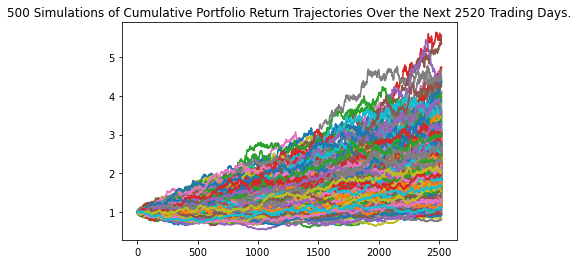

In [33]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

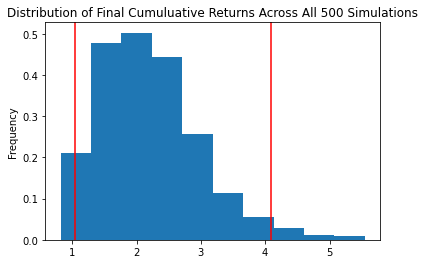

In [34]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              2.213875
std               0.785818
min               0.816550
25%               1.645802
50%               2.119624
75%               2.659763
max               5.549780
95% CI Lower      1.039981
95% CI Upper      4.086109
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment_ten = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62398.86 and $245166.53
